# Assignment 1 - Monte Carlo Simulation, Bayesian Networks

## Setup

In [ ]:
%pip install numpy scipy matplotlib

*Note*: You are only allowed to use numpy, scipy, and matplotlib as external packages in this assignment.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import random

# Set seed for reproducibility
def set_seed():
    random.seed(307)
    np.random.seed(307)

## Task 1.1

**DONE**: Implement Monte Carlo simulation and produce the plot as specified in the assignment sheet.

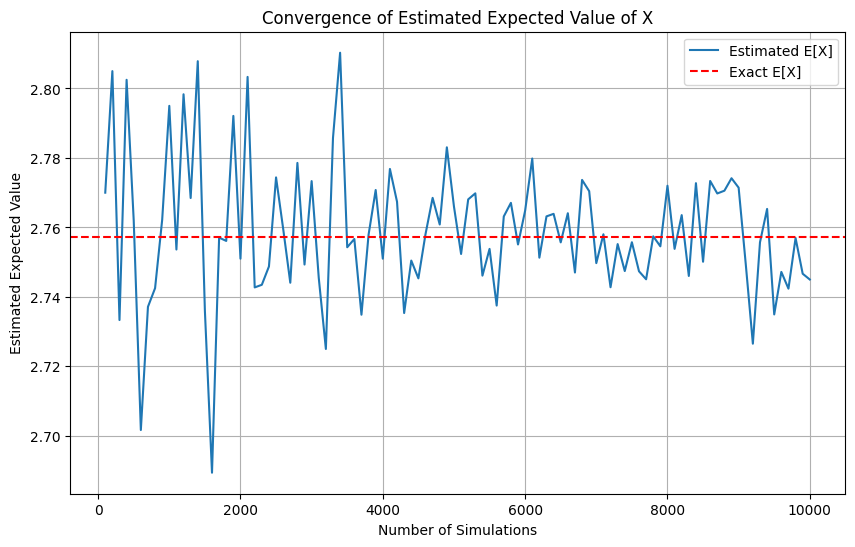

In [3]:
set_seed()

# Given parameter
lambda_value = 4

# Exact normalizing constant M calculated previously
M = (3 * math.exp(4)) / 103

# Calculate probabilities p(X = k) for k = 0 to 4
probabilities = []
for k in range(5):
    p_k = M * (lambda_value ** k) * math.exp(-lambda_value) / math.factorial(k)
    probabilities.append(p_k)

# Normalize probabilities to ensure they sum to 1
probabilities = np.array(probabilities)
probabilities /= probabilities.sum()

# Compute cumulative probabilities for sampling
cumulative_probs = np.cumsum(probabilities)

# Function to generate a single random sample from the distribution
def sample_X():
    r = random.random()
    for k, cp in enumerate(cumulative_probs):
        if r <= cp:
            return k
    return 4  # In case of numerical issues

# Arrays to store simulation counts and estimated expected values
simulation_counts = range(100, 10001, 100)
estimated_expectations = []

# Perform simulations for different numbers of samples
for N in simulation_counts:
    samples = [sample_X() for _ in range(N)]
    estimated_mean = np.mean(samples)
    estimated_expectations.append(estimated_mean)

# Exact expected value calculated analytically
exact_E_X = 284 / 103

# Plotting the convergence of the estimated expected value
plt.figure(figsize=(10, 6))
plt.plot(simulation_counts, estimated_expectations, label='Estimated E[X]')
plt.axhline(y=exact_E_X, color='red', linestyle='--', label='Exact E[X]')
plt.title('Convergence of Estimated Expected Value of X')
plt.xlabel('Number of Simulations')
plt.ylabel('Estimated Expected Value')
plt.legend()
plt.grid(True)
plt.show()

# Task 1.2

**DONE**: Implement the procedure that samples from $p(x)$ using the inverse transform method. 
Create the convergence plot as specified in the assignment sheet

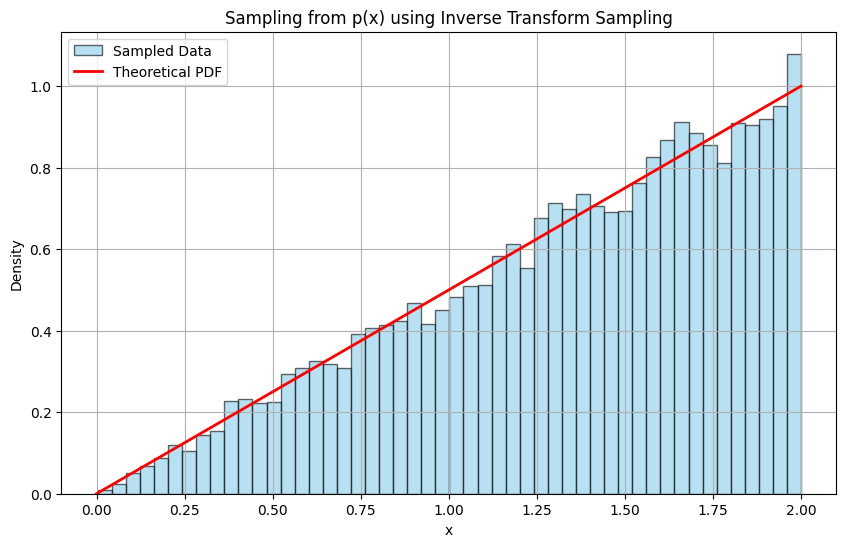

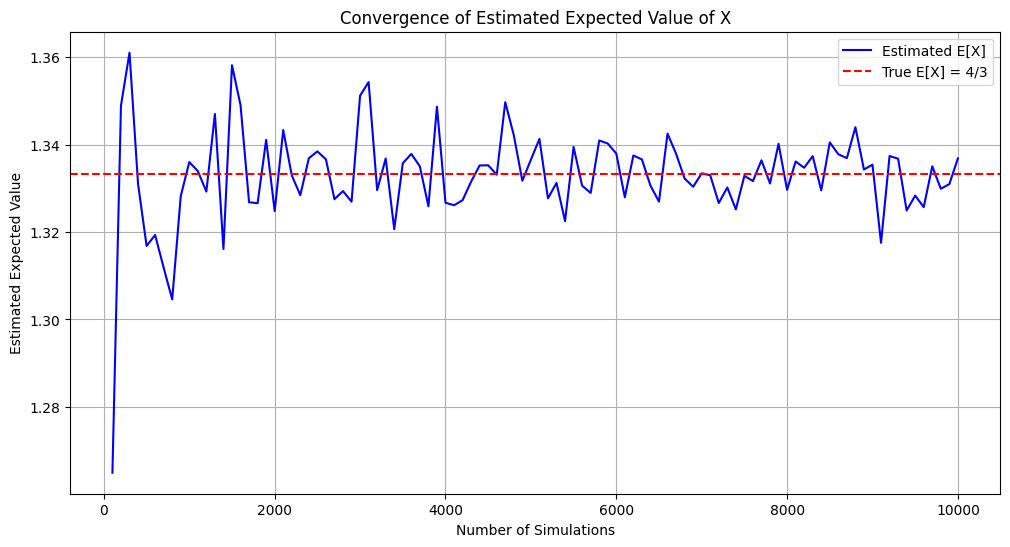

In [6]:
set_seed()

# Function to generate a single sample from p(x)
def sample_from_p():
    u = random.uniform(0, 1)  # Sample u ~ Uniform(0,1)
    x = 2 * math.sqrt(u)      # Compute x = F^{-1}(u)
    return x

# Generate a large number of samples to visualize the distribution
num_samples = 10000
samples = [sample_from_p() for _ in range(num_samples)]

# Plot the histogram of the samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Sampled Data')

# Plot the theoretical PDF for comparison
x_values = np.linspace(0, 2, 200)
pdf_values = (1/2) * x_values  # p(x) = (1/2) x for 0 < x < 2

plt.plot(x_values, pdf_values, 'r-', lw=2, label='Theoretical PDF')
plt.title('Sampling from p(x) using Inverse Transform Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# True expected value calculated analytically
true_expected_value = 4 / 3  # E[X] = 4/3

# Arrays to store the number of simulations and corresponding estimates
simulation_numbers = range(100, 10001, 100)
estimated_expectations = []

# Perform simulations
for N in simulation_numbers:
    samples = [sample_from_p() for _ in range(N)]
    estimated_mean = np.mean(samples)
    estimated_expectations.append(estimated_mean)

# Plotting the convergence
plt.figure(figsize=(12, 6))
plt.plot(simulation_numbers, estimated_expectations, label='Estimated E[X]', color='blue')
plt.axhline(y=true_expected_value, color='red', linestyle='--', label='True E[X] = 4/3')
plt.title('Convergence of Estimated Expected Value of X')
plt.xlabel('Number of Simulations')
plt.ylabel('Estimated Expected Value')
plt.legend()
plt.grid(True)
plt.show()

# Task 1.3

**DONE**: Use Monte Carlo Simulation to approximate the integral.

In [7]:
set_seed()
# Number of samples
N = 5000000  # At least 5,000,000 samples as per the requirement

# Constant K
K = 4 * math.pi ** 2  # K = 4π²

# Function to compute the integrand
def integrand(x, y):
    return math.sin(math.sqrt(x ** 2 + y ** 2 + x + y))

# Generate N samples of x and y uniformly over [0, 2π]
# Using list comprehension for efficient memory usage
samples = [(random.uniform(0, 2 * math.pi), random.uniform(0, 2 * math.pi)) for _ in range(N)]

# Compute the function values
function_values = [integrand(x, y) for x, y in samples]

# Estimate the expected value
expected_value = sum(function_values) / N

# Approximate the integral
integral_estimate = K * expected_value

# Report the results
print(f"Number of samples used: {N}")
print(f"Estimated value of the integral: {integral_estimate}")
pass

Number of samples used: 5000000
Estimated value of the integral: -1.033802328697245


**DONE**: Compare the result to the output of `scipy.integrate.dblquad`

In [8]:
from scipy.integrate import dblquad


# Define the integrand function
def integrand(y, x):
    # Compute the value inside the square root
    value = x**2 + y**2 + x + y
    # To handle potential numerical issues if value is negative (should not be in this domain)
    # We can ensure value is non-negative
    if value < 0:
        value = 0
    return math.sin(math.sqrt(value))

# Limits of integration
x_lower = 0
x_upper = 2 * np.pi

# Since the limits for y are constants, we define them as functions returning constants
def y_lower(x):
    return 0

def y_upper(x):
    return 2 * np.pi

# Compute the integral
result, error = dblquad(integrand, x_lower, x_upper, y_lower, y_upper)

# Report the result
print(f"Value of the integral computed using scipy.integrate.dblquad: {result}")
print(f"Estimated absolute error: {error}")

Value of the integral computed using scipy.integrate.dblquad: -1.0264452622185873
Estimated absolute error: 1.4346924979278762e-08
